<p align="left">
<img src="https://raw.githubusercontent.com/dewdotninja/exams/main/feng_heading_en.png" width=400 alt="Feng heading"/>
</p>

#### Department of Mechanical Engineering

### Homework 1
Second Semester, Academic Year 2025

<br>**01208583 Robotics**

พิมพ์ชื่อ - นามสกุล และรหัสนิสิตในเซลล์ด้านล่างนี้ (สำคัญ หากเว้นว่างไว้หัก 1 คะแนน)


**คำสั่ง :** โน๊ตบุคนี้ประกอบด้วยส่วนที่เป็นเนื้อหาสำหรับอ่าน และส่วนที่ผู้เรียนต้องพิมพ์คำตอบ หรือเขียนโค้ดไพทอนเพื่อได้คะแนนตามที่ระบุ มี 5 ข้อ คือ P1 - P5 ข้อละ 2 คะแนน

อ่านคำสั่งตรงส่วนที่เป็นคะแนนให้เข้าใจชัดเจนว่าโจทย์ต้องการเอาต์พุตอะไร แล้วเขียนโค้ดเพื่อให้ได้เอาต์พุตนั้น เอาต์พุตที่ถูกต้องจะต้องค้างอยู่ใน notebook นี้โดยผู้ตรวจไม่ต้องรันใหม่ 
นอกจากเป็นที่สงสัย อาจจะรันโน๊ตบุคใหม่ตั้งแต่เซลล์บนสุด 
เซลล์ใดที่มีคะแนนและมีเอาต์พุตเป็น error message จะได้คะแนนศูนย์ทันที   

เนื้อหาในโน๊ตบุคนี้จะสอดคล้องกับ lecture 1 - 2 ของคอร์ส [CMU16-745 Optimal Control 2025](https://youtube.com/playlist?list=PLZnJoM76RM6IAJfMXd1PgGNXn3dxhkVgI&si=4YRxQ4ouRsEf_FdB) 



ก่อนที่จะเข้าสู่เนี้อหาของการควบคุม เราต้องเข้าใจพื้นฐานของระบบพลวัต ซึ่งในกรณีทั่วไปคือระบบพลวัตไม่เป็นเชิงเส้น 
ดังนั้นจะกล่าวถึงพลวัตของระบบอย่างง่าย โดยเน้นระบบเชิงกล หากเข้าใจหลักการเบื้องต้นแล้วสามารถต่อยอดไปยังพลวัตหุ่นยนต์ที่มีความซับซ้อนมากขึ้น

## 1.1 พลวัตในระบบเวลาต่อเนื่อง

พลวัตของระบบไม่เป็นเชิงเส้นในเวลาต่อเนื่องโดยทั่วไปที่มีความเรียบ (smooth) เขียนได้ในรูปดังนี้
$$
\dot{x} = f(x,u) \tag{1.1}
$$

โดย $x \in \mathbb{R}^n$ เรียกว่า *สถานะ (state)* และ $u \in \mathbb{R}^m$ เรียกว่า *อินพุต (input)* ฟังก์ชัน f() แทนพลวัต และ $\dot{x}$ คืออนุพันธ์เวลาของสถานะ สังเกตว่า (1.1) อยู่ในรูปของสมการอนุพันธ์อันดับหนึ่ง ซึ่งในระบบใดๆ ที่มีอันดับสูงกว่าสามารถแปลงเป็นสมการอันดับหนึ่งหลายสมการ และเขียนในรูป (1.1) ได้ 

สำหรับระบบเชิงกล สถานะเขียนได้ในรูป
$$
x = \left[\begin{array}{c}
q \\
v
\end{array}\right] \tag{1.2}
$$

โดย $q$ เรียกว่า *โครงแบบ (configuration)* หรือ *โพส (pose)* ซึ่งอาจอยู่ในรูปอื่นนอกเหนือจากเวกเตอร์ 3 มิติที่เราคุ้นเคย (เช่นควอเทอร์เนียน) ส่วน $v$ เรียกว่า *ความเร็ว (velocity)* จะอยู่ในรูปเวกเตอร์

โดยทั่วไป สถานะควรเป็นข้อมูลที่เพียงพอในการบรรยายระบบ ณ เวลาปัจจุบันโดยไม่จำเป็นต้องใช้สถานะในอดีต ตัวอย่างของสถานะที่บรรยายพลวัตไม่ครบถ้วนคือ หากมีแต่ตำแหน่งอย่างเดียวไม่มีความเร็ว จะไม่ทราบได้ว่าวัตถุเคลื่อนที่ไปในทิศทางใดด้วยความเร็วเท่าไร ต้องใช้ตำแหน่งก่อนหน้านี้เพื่อคำนวณค่าความเร็ว

**ตัวอย่าง 1.1** พิจารณาระบบลูกตุ้ม (pendulum) ในรูปที่ 1.1 สมการการเคลื่อนที่เขียนได้เป็นดังนี้

$$
ml^2\ddot{\theta} + mgl \sin(\theta) = \tau \tag{1.3}
$$

เมื่อกำหนดสถานะ
$$
x = \left[\begin{array}{c}
q \\
v
\end{array}\right] = \left[\begin{array}{c}
\theta \\
\dot{\theta}
\end{array}\right]
$$

และอินพุต $u = \tau$ จะได้ว่า
$$\begin{align*}
\dot{x} &= f(x,u) \\ \Rightarrow \left[\begin{array}{c}
\dot{\theta} \\
\ddot{\theta}
\end{array}\right] &= \left[\begin{array}{c}
\dot{\theta} \\
-\frac{g}{l}\sin{\theta} + \frac{1}{ml^2}u
\end{array}\right] 
\end{align*} \tag{1.4}
$$

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/pendulum.png" width=600 />

รูปที่ 1.1 ระบบลูกตุ้ม 

สังเกตว่าสำหรับระบบลูกตุ้มนี้ ปริภูมิของโครงแบบคือวงกลม $q \in \mathbb{S}^1$ และปริภูมิสถานะเป็นทรงกระบอก $x \in \mathbb{S}^1 \times \mathbb{R}$

### 1.1.1 ระบบควบคุมสัมพรรค

ระบบไม่เป็นเชิงเส้นส่วนใหญ่สามารถเขียนอยู่ในรูป
$$
\dot{x} = f_o(x) + B(x)u \tag{1.5}
$$
เรียกว่า *ระบบควบคุมสัมพรรค (control-affine systems)* โดยพจน์ $f_o(x)$ เรียกว่า *ดริฟท์ (drift)* และเมทริกซ์ $B(x)$ เรียกว่า *อินพุตจาโคเบียน (Jacobian input)* 

จากระบบลูกตุ้มในตัวอย่าง 1.1 จะได้ว่า
$$
f_o(x) = \left[\begin{array}{c}
\dot{\theta} \\
-\frac{g}{l}\sin{\theta}
\end{array}\right] , \;\; B(x) = \left[\begin{array}{c}
0 \\
-\frac{1}{ml^2}
\end{array}\right] \tag{1.6}
$$

### 1.1.2 พลวัตตัวจัดการ

สมการการเคลื่อนที่อีกรูปแบบหนึ่งที่เหมาะสมกับระบบเชิงกลเรียกว่า *พลวัตตัวจัดการ (manipulator dynamics)* เขียนได้เป็นดังนี้
$$
M(q)\dot{v} + C(q,v) = B(q)u + F \tag{1.7}
$$
นิยมเรียก $M(q)$ ว่าเมทริกซ์มวล (mass matrix) $C(q,v)$ ว่าค่าเอนเอียงพลวัต (dynamic bias) หรือคอริออลิส (coriolis) รวมพจน์แรงโน้มถ่วง (gravity) $B(q)$ คืออินพุตจาโคเบียน และ $F$ รวมแรงจากภายนอกอื่นที่นอกเหนือจากอินพุต เช่นแรงเสียดทาน

เนื่องจาก (1.7) บรรยายพลวัตเท่านั้น หากต้องการบรรยายสถานะเต็มของระบบ ต้องการสมการเพิ่มเติมคือ
$$
\dot{q} = G(q)v \tag{1.8}
$$
เรียกว่า *จลนศาสตร์ความเร็ว (velocity kinematics)* โดย $G(q)$ คือ *จาโคเบียนจลนศาสตร์* ตัวอย่างเช่นกรณี $\dot{q}$ คือควอเทอร์เนียน 4 มิติ 
ขณะที่ $v$ คือความเร็วเชิงมุมใน 3 มิติ จึงต้องผ่านตัวแปลง $G(q)$ 

ดังนั้นพลวัตในรูป (1,1) เขียนได้ดังนี้
$$
\dot{x} = f(x,u) = \left[\begin{array}{c}
G(q)v \\
M^{-1}(q)(B(x)u + F - C(q,v))
\end{array}\right] \tag{1.9}
$$
สำหรับกรณีระบบลูกตุ้มในตัวอย่าง 1.1
$$
M(q) = ml^2, \;\; C(q,v) = mgl\sin(\theta), \;\; B = I, G = I \tag{1.10}
$$

จุดที่น่าสนใจสำหรับการบรรยายพลวัตตัวจัดการคือ ระบบเชิงกลของวัตถุคงรูป (rigid body) เกือบทั้งหมด เช่นหุ่นยนต์สามารถเขียนอยู่ในรูปนี้ได้ เนื่องจากเป็นเสมือนวิธีหนึ่งในการเขียน *สมการออยเลอร์-ลากรานจ์ (Euler-Lagrange equation)* 
$$
L = \frac{1}{2}v^TM(q)v - U(q) \tag{1.11}
$$
โดยทางด้านขวาของ (1.11) พจน์แรกคือพลังงานจลน์ (kinetic energy) และพจน์ที่สองคือพลังงานศักย์ (potential energy) สังเกตว่าจากหลักการทางฟิสิกส์ พลังงานจลน์ใน (1.11) ต้องเป็นบวกเสมอ ดังนั้นเมทริกซ์มวล $M$ จะต้องเป็นแบบสมมาตรและบวกแน่นอนเสมอ ทำให้สามารถหาค่าผกผันของ $M$ ใน (1.9) ได้

เครื่องมือซอฟต์แวร์สำหรับหุ่นยนต์นิยมใช้รูปแบบสมการพลวัตตัวจัดการ


### 1.1.3 ระบบเชิงเส้น

สมการพลวัตเรียกว่าเป็น *ระบบเชิงเส้น (linear systems)* หากเขียนได้อยู่ในรูป
$$
\dot{x} = A(t)x + B(t)u \tag{1.12}
$$
ในกรณีทั่วไปเมทริกซ์ $A(t), B(t)$ ขึ้นกับเวลา เรียกว่าระบบแปรตามเวลา (time varying) แต่หากเมทริกซ์ $A(t) = A, \;B(t) = B$ เรียกว่าระบบไม่แปรตามเวลา (time invariant) (นิยมเรียกตัวย่อ LTI) 

ระบบเชิงเส้นมีความสำคัญอย่างยิ่งยวดในสาขาระบบควบคุม เนื่องจากเราสามารถประมาณค่าระบบไม่เป็นเชิงเส้นเป็นระบบเชิงเส้นเฉพาะที่ (local) 
และระบบควบคุมมักทำงานได้ดี การประมาณค่ารอบจุดทำงาน $x^*, u^*$ ทำได้ดังนี้
$$
\dot{x} = f(x,u) \;\; \Rightarrow \;\; A = \frac{\partial f}{\partial x}\Big|_{x^*,u^*},\; B = \frac{\partial f}{\partial u}\Big|_{x^*,u^*} \tag{1.13}
$$

***

## โจทย์ปัญหา P.1 (2 คะแนน)

ระบบไม่เป็นเชิงเส้น $\dot{x} = f(x,u)$ มิพลวัตดังนี้
$$
\left[\begin{array}{c}
y_1 \\
y_2
\end{array}\right] =
\left[\begin{array}{c}
x_1^3  + 2x_2 - 2ux_1^2\\
x_1cos(x_2) + 0.5ux_2
\end{array}\right] 
$$

ต้องการประมาณค่าเชิงเส้นรอบจุดทำงาน $x = [-1.0, \; \pi/2], \; u = 1.0$, คำนวณเมทริกซ์ $A$, $B$ ตาม (1.13)

**หมายเหตุ :** จะใช้การคำนวณด้วยมือ หรือใช้แพ็กเกจหาอนุพันธ์อัตโนมัติช่วยก็ได้

### แสดงวิธีทำและคำตอบ

***

# 1.2 จุดสมดุล

นิยามของสมดุล (equilibrium) คือจุดที่ระบบคงอยู่ในสถานะพัก (remains at rest) ในทางคณิตศาสตร์
$$
\dot{x} = f(x,u) = 0 \tag{1.14}
$$

พิจารณาจาก (1.14) ในทางพีชคณิตสมดุลคือค่ารากของสมการพลวัต 

ในระบบลูกตุ้ม เมื่อกำหนดเงื่อนไขสมดุล
$$
\dot{x} = \left[\begin{array}{c}
\dot{\theta} \\
-\frac{g}{l} \sin(\theta)
\end{array}\right] = \left[\begin{array}{c}
0 \\
0
\end{array}\right] \tag{1.15}
$$
จะได้ว่า
$$
\begin{align*}
\dot{\theta} &= 0 \\
\theta &= 0, \pi, 2\pi, \ldots \tag{1.16}
\end{align*}
$$

คือลูกตุ้มอยู่ในตำแหน่งตั้งฉากกับพื้น ในทิศทางตกสู่พื้นหรือชี้ขึ้น ดังแสดงในรูปที่ 1.2 

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/hw1_pend_vert.png" height=400 />

รูปที่ 1.2 จุดสมดุลของระบบลูกตุ้ม 

คำถามคือจดสมดุลทั้งสองนี้มีความแตกต่างกันอย่างไร? เป็นประเด็นที่เราจะได้ศึกษาต่อไป

**ตัวอย่าง 1.2** ปัญหาการควบคุมลูกตุ้มอย่างง่าย 

หากเราต้องการจะย้ายตำแหน่งสมดุลย์ของลูกตุ้มจะทำได้หรือไม่? สมมุติว่าต้องการตำหน่งสมดุลเป็นทิศทางขนานกับพื้นดังในรูปที่ 1.3

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/hw1_pend_horiz.png" width=350 />

รูปที่ 1.3 การย้ายจุดสมดุลของระบบลูกตุ้มโดยตัวควบคุม 

จะเห็นว่ากรณีนี้เราต้องการตัวควบคุม $u$ ที่จะต้านแรงโน้มถ่วง จากสมการพลวัตลูกตุ้ม จะได้ว่า
$$
\dot{x} = \left[\begin{array}{c}
\dot{\theta} \\
-\frac{g}{l} \sin(\pi /2) + \frac{1}{ml^2}u
\end{array}\right] = \left[\begin{array}{c}
0 \\
0
\end{array}\right] \tag{1.15}
$$
คำนวณหาตัวควบคุมได้ดังนี้
$$
\begin{align*}
\frac{1}{ml^2}u  &= \frac{g}{l}\sin(\pi/2) \\
u &= mgl \tag{1.16}
\end{align*}
$$

ในกรณีทั่วไปคือปัญหาการหาค่าราก (root finding problem) สำหรับตัวควบคุม $u$

***

## โจทย์ปัญหา P.2 (2 คะแนน)

คำนวณหาตัวควบคุม $u$ ที่ทำให้ระบบลูกตุ้มที่มีมวล $m = 2.0$ กก. ความยาวก้าน $0.7$ เมตร มีจุดสมดุลอยู่ที่ $\theta = -\pi/3$ 

### แสดงวิธีทำและคำตอบ

*** 
## 1.2.1 เสถียรภาพของจุดสมดุล 

คำว่าเสถียรภาพ (stability) มีหลายนิยาม ในบริบทนี้บรรยายเป็นคำพูดเพื่อให้เข้าใจง่ายว่า เสถียรภาพของจุดสมดุลคือกรณีที่ระบบยังคง "อยู่ใกล้" จุดสมดุลภายใต้การรบกวน (perturbation) 

จากตัวอย่างของระบบลูกตุ้มที่ไม่มีการหน่วงในตัวอย่าง 1.1 จุดสมดุลที่ $\theta = 0$ เรียกว่าเสถียร เพราะเมื่อใช้แรงผลักเล็กน้อย ลูกตุ้มจะแกว่งไม่มีที่สิ้นสุด แต่ขนาดของการแกว่งไม่ใหญ่ขึ้น ในทางตรงข้าม จุดสมดุลที่ $\theta = \pi$ ไม่เสถียร เพราะหากมีการรบกวนเพียงเล็กน้อย ลูกตุ้มจะออกจากตำแหน่งสมดุลนั้น (ไม่สามารถแกว่งอยู่ใกล้จุดสมดุล)

**ตัวอย่าง 1.3** พิจารณาระบบหนึ่งมิติ ($x \in \mathbb{R}$ ในรูปที่ 1.4 มีลักษณะใกล้เคียงกับพลวัตของระบบลูกตุ้ม 

**หมายเหตุ :** กราฟสองมิติที่แกนนอนเป็นสถานะและแกนตั้งเป็นความเร็วนี้เรียกว่า *ระนาบเฟส (phase plane)*  

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/hw1_eq_pts.png" width=700 />

รูปที่ 1.4 ภาพระนาบเฟสของระบบหนึ่งมิติ 

สังเกตว่าจุดที่กราฟตัดกับแกน $x$ คือจุดสมดุล เพราะ $\dot{x} = 0$ สอดคล้องกับ (1.14) จากรูปมีจุดตัดแกน $x$ 3 จุด จากระบบมิติเดียวนี้สามารถตัดสินได้โดยง่ายว่าจุดใดเสถียร โดยพิจารณาว่า $x$ และ $\dot{x}$ จะต้องมีทิศทางตรงข้ามกัน ตำแหน่งจึงจะสามารถแกว่งอยู่รอบจุดนั้นได้ หาก $x$ และ $\dot{x}$ ไปในทิศทางเดียวกัน ก็จะมีขนาดใหญ่ขึ้นเรื่อยๆ ห่างออกจากจุดสมดุลนั้น กล่าวคือ เราสามารถพิจารณาจากความชันได้ว่าระบบเสถียรหรือไม่ 
$$
\frac{\partial f}{\partial x} \lt 0 \Rightarrow เสถียร ,\;\;\; \frac{\partial f}{\partial x} \gt 0 \Rightarrow ไม่เสถียร \tag{1.17}
$$

สังเกตว่าในช่วงระหว่างจุดสมดุลที่ไม่เสถียรทั้งด้านบวกและลบของแกน $x$ การเคลื่อนที่จะเข้าสู่จุดสมดุลที่เสถียรคือ $x = 0$ เราเรียกย่านนี้ว่า *แอ่งของการดึงดูด (basin of attraction)* 

หลักการนี้ยังสามารถขยายไปสู่ระบบที่มิติสูงขึ้น ในระบบมิติเท่ากับ $n$ $\frac{\partial f}{\partial x}$ เป็นเมทริกซ์จาโคเบียน $n \times n$ ดังนั้นจึงต้องใช้วิธีการแยกค่าลักษณะเฉพาะ (eigen-decompostion) เพื่อแยกเป็นระบบมิติเดี่ยวจำนวน $n$ ระบบ จะได้ว่า
$$
\begin{align*}
Re\Big[eigvals\Big(\frac{\partial f}{\partial x}\Big)\Big] &\lt 0 \Rightarrow เสถียร \\
Re\Big[eigvals\Big(\frac{\partial f}{\partial x}\Big)\Big] &\gt 0 \Rightarrow ไม่เสถียร \tag{1.18}
\end{align*}
$$

โดย $Re[\;]$ คือส่วนค่าจริงของจำนวนเชิงซ้อน และ $eigvals(\;)$ คือการคำนวณค่าลักษณะเฉพาะ

**หมายเหตุ :** การตรวจสอบเสถียรภาพนี้ตรงกับที่เรียกว่า *วิธีแรกของเลียพูนอฟ (Lyapunov first method)* ซึ่งสรุปได้เฉพาะสองกรณีตาม (1.18) เท่านั้น ไม่สามารถสรุปเสถียรภาพได้สำหรับกรณี $Re\Big[eigvals\Big(\frac{\partial f}{\partial x}\Big)\Big] = 0$

เมื่อใช้หลักการนี้ตัดสินเสถียรภาพของจุดสมดุลในระบบลูกตุ้ม

$$
f(x) = \left[\begin{array}{c}
\dot{\theta} \\
-\frac{g}{l}\sin{\theta}
\end{array}\right]  \;\; \Rightarrow \;\; \frac{\partial f}{\partial x} = 
\left[\begin{array}{cc}
0 & 1 \\
-\frac{g}{l}\cos{\theta} & 0
\end{array}\right]
$$

ที่จุดสมดุล $\theta = \pi$ 
$$
\frac{\partial f}{\partial x} \bigg|_{\theta = \pi} = 
\left[\begin{array}{cc}
0 & 1 \\
\frac{g}{l} & 0
\end{array}\right] \;\; \Rightarrow \;\; eigvals\Big(\frac{\partial f}{\partial x}\Big) = \pm \sqrt{\frac{g}{l}}
$$
จะเห็นว่าค่าลักษณะเฉพาะตัวหนึ่งเป็นจำนวนจริงค่าบวก ดังนั้นสรุปได้ว่าจุดสมดุลในตำแหน่งชี้ขึ้นไม่เสถียร 
ที่จุดสมดุล $\theta = 0$ 
$$
\frac{\partial f}{\partial x} \bigg|_{\theta = 0} = 
\left[\begin{array}{cc}
0 & 1 \\
\frac{g}{l} & 0
\end{array}\right] \;\; \Rightarrow \;\; eigvals\Big(\frac{\partial f}{\partial x}\Big) = \pm i \sqrt{\frac{g}{l}}
$$

เป็นกรณีที่ค่าลักษณะเฉพาะมีค่าจริงเป็นศูนย์ และค่าจินตภาพเป็นสังยุค ทำให้ผลตอบสนองเป็น *การแกว่งแบบไร้การหน่วง (undamped oscillation)* อาจเรียกว่าเสถียรในบริบทของเสถียรภาพที่นิยามว่าการเคลื่อนที่ไม่ออกห่างจากจุดสมดุล อย่างไรก็ตามการแกว่งจะไม่มีที่สิ้นสุด คำศัพท์ด้านระบบควบคุมคือ *เสถียรตามขอบ (marginally stable)* หากต้องการให้การเคลื่อนที่ลู่เข้าสู่จุด $\theta = 0$ จำเป็นต้องมีตัวควบคุมเพื่อเพิมการหน่วงให้กับระบบเช่น $u = K_d\dot{\theta}$ ซึ่งจะทำให้ค่าลักษณะเฉพาะของระบบป้อนกลับมีค่าจำนวนจริงเป็นลบ



# 1.3 พลวัตในระบบเวลาวิยุต

กล่าวได้ว่าในปัจจุบัน *ระบบเวลาวิยุต (discrete-time systems)* ได้รับความสนใจมากขึ้นกว่าสมัยก่อนมาก เหตุผลหลักคือความก้าวหน้าของวิทยาการคอมพิวเตอร์ที่เข้ามาเปลี่ยนแปลงวิธีการและแนวคิดของแทบทุกสาขา รวมถึงเนื้อหาในวิชานี้ที่เกี่ยวข้องกับการคำนวณหาค่าหมาะที่สุด  การทำงานของอัลกอริทึมคืออ่านค่าและคำนวณตามคาบเวลาที่กำหนด ซึ่งแม้จะสั้นมากเพียงใดก็จะยังเป็นค่าที่ไม่ต่อเนื่อง 

แรงจูงใจในการศึกษาพลวัตในระบบเวลาวิยุดคือ เราไม่สามารถหาคำตอบ $x(t)$ สำหรั้บพลวัต $\dot{x} = f(x)$ สำหรับกรณีทั่วไปได้โดยวิธีวิเคราะห์ในระบบเวลาต่อเนื่อง แต่ในด้านการคำนวณมีวิธีการหลากหลายในการหาคำตอบ แต่สิ่งที่ต้องทำคือบรรยาย $x(t)$ ในรูปตัวแปรวิยุต $x_k$ โดยในหนังสือนี้จะใช้ตัวห้อยเลขจำนวนเต็ม $k$ แทนตัวชี้ของข้อมูลในแต่ละคาบเวลาการสุ่ม  นอกจากนั้น 
โมเดลเวลาวิยุตยังสามารถได้รับผลกระทบบางประการที่ไม่เกิดกับพลวัตในเวลาต่อเนื่อง เช่นผลจากคาบเวลาการสุ่ม ความแม่นยำที่จำกัดในการเก็บข้อมูล และปัญหาเชิงเลขอื่นๆ 

พลวัตในระบบเวลาวิยุตโดยทั่วไปมักอยู่ใน *รูปชัดแจ้ง (explicit form)* 
$$
x_{k+1} = f_d(x_k,u_k) \tag{1.19}
$$

โดยในรูปนี้ สถานะในการสุ่มเวลาครั้งต่อไป $x_{k+1}$ บรรยายได้เป็นฟังก์ชันของสถานะก่อนหน้า $x_k$ และอินพุต $u_k$

**หมายเหตุ :** จะใช้ $f_d()$ แทนฟังก์ชันในระบบเวลาวิยุดในช่วงต้น โดยตัวห้อย $d$ แทน "discrete" ต่อไปจะละทิ้งตัวห้อยนี้เมื่อโดเมนเวลาชัดเจนจากบริบท

การแปลงเป็นระบบวิยุตทำได้หลายวิธี วิธีง่ายที่สุดเรียกว่า *การหาปริพันธ์ออยเลอร์ข้างหน้า (forward Euler integration)* 
$$
x_{k+1} = f_d(x_k,u_k) = x_k + hf(x_k,u_k) \tag{1.20}
$$
โดย $h$ คือค่าขั้นเวลา เราอาจมองว่าวิธีการออยเลอร์ข้างหน้าคือการประมาณค่าโดยความชันคงที่ 

***

## โจทย์ปัญหา P.3 (2 คะแนน)

ในวิชา CMU16-745 [Lecture 2 นาที 45](https://youtu.be/_Swoo8n7DFM?si=1FBafoqInumUfXg2&t=2698) ผู้สอนได้แสดงการจำลองระบบลูกตุ้มโดยวิธีออยเลอร์ข้างหน้าโดยจูเลีย เมื่อกำหนด $l = 1$ เมตร $m = 1$ กก. 
ผลที่ได้คือเอาต์พุตแกว่งด้วยขนาดใหญ่ขึ้น (แทนที่จะมีขนาดคงที่) นี่คือผลที่ไม่พึงประสงค์เมื่อใช้วิธีการนี้ 

แสดงการจำลองที่ให้ผลเหมือนกันโดยภาษาไพทอน ทดลองลดค่าขั้นเวลา $h$ จะพบว่าเอาต์พุตยังคงแกว่งด้วยขนาดใหญ่ขึ้น 

### เขียนโค้ดโปรแกรมไพทอน

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
def pendulum_dynamics(x):
    pass
    # fill in your code here

In [ ]:
def pendulum_forward_euler(func, x0, Tf, h):
    pass
    # fill in your code here

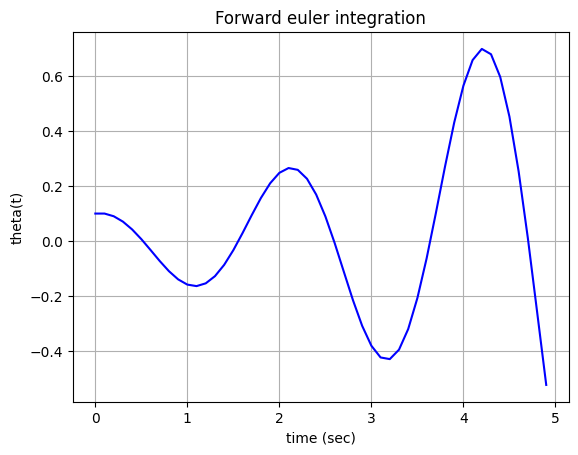

In [7]:
x0 = np.array([.1,0])
h = 0.1  # try reducing this
x_hist1, t_hist1 = pendulum_forward_euler(pendulum_dynamics, x0, 5, h) # adjust Tf to see results clearly
plt.figure()
plt.plot(t_hist1, x_hist1[0,:],'b-')
plt.xlabel('time (sec)')
plt.ylabel('theta(t)')
plt.grid(True)
plt.title('Forward euler integration')
plt.show()

## 1.3.1 เสถียรภาพของระบบเวลาวิยุต 

พิจารณาพลวัตในระบบเวลาวิยุต (1.19) สมมุติว่าสถานะเริ่มต้นคือ $x_0$ การคำนวณสถานะในขั้นเวลา $N$ ก็คือการส่งแบบทำซ้ำ (iterative map)
$$
x_N = f_d(f_d(f_d( \ldots f_d(x_0)))) \tag{1.21}
$$
ประมาณค่าเชิงเส้นและใช้กฎลูกโซ่ จะได้ว่า
$$
\frac{\partial x_N}{\partial x_0} = \frac{\partial f_d}{\partial x}\bigg|_{x_0}\frac{\partial f_d}{\partial x}\bigg|_{x_0} \ldots \;\frac{\partial f_d}{\partial x}\bigg|_{x_0} = A_d^N \tag{1.22}
$$

กำหนด $x_0 = 0$ เป็นจุดสมดุล (โดยไม่เสียความเป็นทั่วไป เพราะสามารถใช้การแปลงพิกัด) ดังนั้นหากระบบเสถียรจะได้ว่า
$$
\begin{align*}
&\underset{k \rightarrow \infty}{lim} \; A_d^kx_0 = 0 \forall x_0 \\
\Rightarrow \; &\underset{k \rightarrow \infty}{lim} A_d^k = 0 \\
\Rightarrow \; &|eigvals(A_d)| \lt 1 \tag{1.23}
\end{align*} 
$$
กล่าวคือ จุดสมดุลเสถียร ค่าลักษณะเฉพาะของ $A_d$ จะต้องอยู่ใน *วงกลมหนึ่งหน่วย (unit circle)* ซึ่งเป็นหลักการที่สำคัญในการศึกษาระบบเวลาวิยุต

พิจารณาระบบลูกตุ้มที่แปลงเป็นระบบเวลาวิยุดโดยวิธีออยเลอร์ข้างหน้า (1.20) จะได้ว่า
$$
A_d = \frac{\partial f_d}{\partial x} = I + hA = I = h\left[\begin{array}{cc}
0 & 1 \\
-\frac{g}{l}cos(\theta) & 0 \tag{1.24}
\end{array}\right]
$$
เมื่อคำนวณค่าลักษณะเฉพาะ จะได้ว่า
$$
eigvals(A_d|_{\theta = 0}) \approx 1 \pm \epsilon i 
$$

โดยค่า $\epsilon$ เป็นค่าน้อยขึ้นอยู๋กับค่าขั้นเวลา $h$ เช่น $\epsilon = 0.3$ เมื่อ $h = 0.1$ วินาที แต่ไม่ว่าค่าจะน้อยเท่าไรจะส่งผลทำให้ค่าลักษณะเฉพาะของ $A_d$ ออกนอกวงกลมหนึ่งหน่วย ทำให้เป็นระบบที่ไม่เสถียร และการแกว่งจะมีขนาดใหญ่ขึ้นดังแสดงในผลการจำลอง


***

## โจทย์ปัญหา P.4 (2 คะแนน)

ในวิชา CMU16-745 [Lecture 2 เวลา 1:01:20](https://youtu.be/_Swoo8n7DFM?si=3_3ygI9jXVsffz99&t=3680) ผู็สอนได้แสดงโค้ดจูเลียที่พล็อตขนาดของค่าลักษณะเฉพาะเทียบกับค่าขั้นเวลา แปลงโค้ดนั้นเป็นไพทอน ซึ่งจะได้เอาต์พุตเหมือนกัน

### เขียนโค้ดโปรแกรมไพทอน

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

สร้างเมทริกซ์ $A_d$ ตาม (1.24)

In [ ]:
def pendulum_euler_Ad(x0, h):
    g = 9.81
    Ad = # add your code here
    return Ad

กำหนดค่าขั้นเวลาและค่าเริ่มต้น คำนวณค่าลักษณะเฉพาะ

In [4]:
h = 0.1
x0 = np.array([.1,0])
np.linalg.eigvals(pendulum_euler_Ad(x0,0.1))

array([1.+0.31242584j, 1.-0.31242584j])

จะเห็นว่าค่าลักษณะเฉพาะมีขนาดมากกว่า 1 ไม่ว่าจะปรับค่า $h$ น้อยเพียงใด 

In [12]:
h= 0.001
abs(np.linalg.eigvals(pendulum_euler_Ad(x0,h))[0])

np.float64(1.000004880483521)

พล็อตขนาดค่าลักษณะเฉพาะของ $A_d$ เทียบกับค่าขั้นเวลา $h$ จะเห็นว่าค่าจะเพิ่มขึ้นตามค่า $h$ โดยมีค่าน้อยสุดคือ 1 เมื่อ $h = 0$

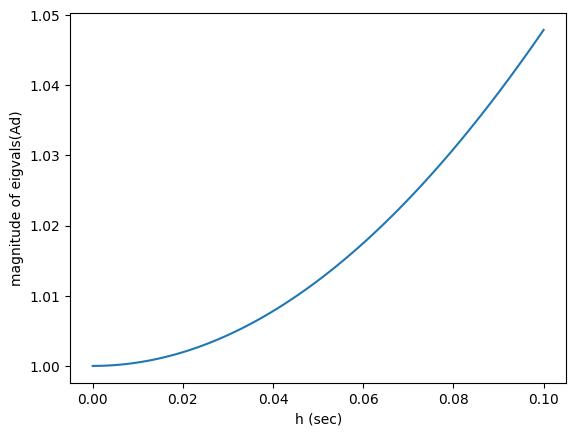

In [ ]:
eignorms = np.zeros((100,))
hvec = np.linspace(0,0.1,100)
x_0 = np.array([0,0])
for k in range(len(eignorms)):
    eignorms[k] = np.max(abs(np.linalg.eigvals(pendulum_euler_Ad(x_0,hvec[k]))))
plt.plot(hvec, eignorms)
plt.xlabel('h (sec)')
plt.ylabel('magnitude of eigvals(Ad)')
plt.show()

*** 

**สหัชญาณ (intuition)** 

จากผลการจำลองนี้ จะเห็นว่าวิธีการออยเลอร์ข้างหน้าทำจุดสมดุลที่เสถียรเป็นไม่เสถียรได้ หรือกล่าวได้ว่าวิธีการนี้เพิ่มพลังงานให้กับระบบ จึงเป็นวิธีการหาปริพันธ์ที่ควรหลีกเลี่ยง

รูปที่ 1.5 อาจทำให้เข้าใจดีขึ้นว่าทำไมถึงเกิดเหตุการณ์เช่นนี้ การหาปริพันธ์โดยวิธีออยเลอร์ข้างหน้าคือการประมาณค่าความชันโดยเส้นตรง และเคลื่อนไปตามเส้นตรงนั้นตามขั้นเวลา $h$ ซึ่งจะเห็นว่าการประมาณค่านี้จะพุ่งเกินตำแหน่งจริงอยู่เสมอ ทำให้ขนาดของการแกว่งใหญ่ขึ้นจนไม่เสถียร


<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/hw1_fwd_eul_intuition.png" width=700 />

รูปที่ 1.5 ภาพระนาบเฟสของระบบหนึ่งมิติ 

วิธ๊การหาปริพันธ์แบบชัดแจ้งที่ดีกว่า และนิยมใช้อย่างแพร่หลายคือ *วิธีรุงเงอ-คุททา อันดับ 4 (4th orderr Runge-Kutta method)* [2]ซึ่งต่อไปจะเรียกย่อว่าวิธี RK4 ชื่อรุงเงอ-คุททา มาจากชื่อของนักคณิตศาสตร์ชาวเยอรมัน Carl Runge และ Wilhelm Kutta ผู้พัฒนาวิธีการนี้ขึ้น 

RK4 ประมาณค่า $x(t)$ โดยพหุนามกำลังสาม (cubic polynomials) แทนที่จะใช้เส้นตรง ทำให้มีความแม่นยำสูงกว่าวิธีการออยเลอร์ข้างหน้า 

สำหรับพลวัต
$$
x_{k+1} = f(x_k)
$$

เขียนโครงสร้างโค้ดได้ดังนี้

**Pseudo-code :** 

```python
k1 = f(xk)
k2 = f(xk+(h/2)*k1)
k3 = f(xk+(h/2)*k2)
k3 = f(xk+(h/2)*k3)
xk_new = xk + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
```

**หมายเหตุ :** xk_new ในโค้ดด้านบน หมายถึง $x_{k+1}$

จะเห็นว่ามีการเรียกฟังก์ชันพลวัต 4 ครั้ง และนำเอาต์พุตมาเฉลี่ยกัน โดยเราให้ค่าน้ำหนักกับ k2, k3 มากกว่า ก่อนจะหาค่าเฉลี่ย ความแม่นยำที่สูงขึ้นต้องแลกมาด้วยการคำนวณที่มากขึ้น อย่างไรก็ตามไม่เป็นอุปสรรคสำหรับสมรรถนะของคอมพิวเตอร์ปัจจุบัน RK4 จึงเป็นวิธีการหาปริพันธ์ที่ได้รับความนิยมอย่างมากในการจำลองพลวัต

***

## โจทย์ปัญหา P.5 (2 คะแนน)

ในวิชา CMU16-745 [Lecture 2 เวลา 1:09:00](https://youtu.be/_Swoo8n7DFM?si=i85RKk4Ebj_baIKI&t=4141) ผู็สอนได้แสดงโค้ดจูเลียสำหรับวิธี RK4 และพล็อตค่าลักษณะเฉพาะเทียบกับค่าขั้นเวลา แปลงโค้ดทั้งหมดเป็นไพทอน 

### เขียนโค้ดโปรแกรมไพทอน

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

จากฟังก์ชันพลวัตเดิมในโจทย์ปัญหา P.3 

In [ ]:
def pendulum_dynamics(x):
    pass
    # your code here

สร้างฟังก์ชันคำนวณปริพันธ์ RK4 ดังนี้

In [ ]:
def fd_pendulum_rk4(xk,h):
    f1 = pendulum_dynamics(xk)
    f2 = ? # fill in your code for these 4 lines
    f3 = ?
    f4 = ?
    return xk + (h/6.0)*(f1 + 2*f2 +2*f3 + f4)
    

เขียนฟังก์ชัน pendulum_rk4(x0, Tf, h) เพื่อจำลองพลวัตโดยรับอาร์กิวเมนต์เป็นสถานะเริ่มต้น เวลาสิ้นสุด และค่าขั้นเวลา

In [4]:
def pendulum_rk4(func, x0, Tf, h):
    t = np.arange(0,Tf,h)
    x_hist = np.zeros((len(x0),len(t)))
    x_hist[:,0] = x0
    for k in range(len(t)-1):
        x_hist[:,k+1] = fd_pendulum_rk4(x_hist[:,k], h)
    
    return x_hist, t

จำลองระบบโดยปรับค่าสถานะเริ่มต้น เวลาสิ้นสุด และค่าขั้นเวลาตามต้องการ

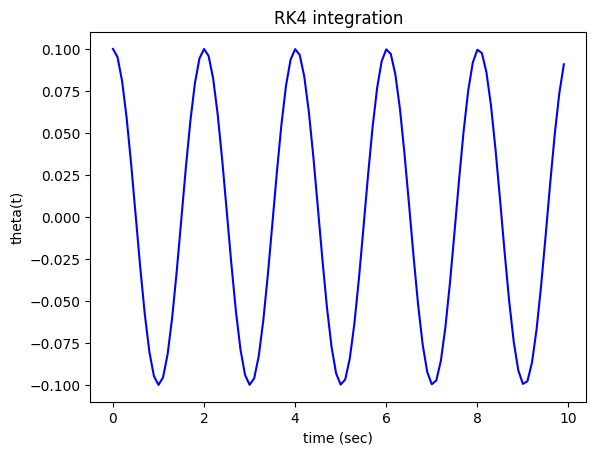

In [5]:
x0 = np.array([.1,0])
h = 0.1
Tf = 10.0
x_hist2, t_hist2 = pendulum_rk4(pendulum_dynamics, x0, Tf, h)
plt.figure()
plt.plot(t_hist2, x_hist2[0,:],'b-')
plt.xlabel('time (sec)')
plt.ylabel('theta(t)')
plt.title('RK4 integration')
plt.show()

จะเห็นว่าผลตอบสนองเป็นการแกว่งที่มีขนาดคงที่ ไม่ใหญ่ขึ้นจนไม่เสถียรเช่นกรณีวิธีออยเลอร์ข้างหน้า 

พล็อตขนาดของค่าลักษณะเฉพาะเทียบกับขั้นเวลา โดยใช้ torch ช่วยคำนวณอนุพันธ์อัตโนมัติ (สามารถใช้แพ็กเกจอื่นได้ตามต้องการ)

In [6]:
import torch
from torch.func import jacfwd

ในการใช้ torch ต้องนิยามฟังก์ชัน pendulum_dynamics() ใหม่ ตามที่ได้อธิบายในภาคผนวก C1 ตั้งชื่อใหม่เป็น torch_pendulum_dynamics() ดังนี้


In [15]:
def torch_pendulum_dynamics(x):
    l = 1.0
    g = 9.81
    y = torch.zeros(2)
    y[0] = x[1]
    y[1] = -(g/l)*torch.sin(x[0])
    return y 

นิยาม torch_fd_pendulum_rk4() 

In [16]:
def torch_fd_pendulum_rk4(xk,h):
    f1 = torch_pendulum_dynamics(xk)
    f2 = torch_pendulum_dynamics(xk + 0.5*h*f1)
    f3 = torch_pendulum_dynamics(xk + 0.5*h*f2)
    f4 = torch_pendulum_dynamics(xk + h*f3)
    return xk + (h/6.0)*(f1 + 2*f2 +2*f3 + f4)
    

คำนวณ $A_d$ และขนาดของค่าลักษณะเฉพาะ

In [ ]:
x = torch.tensor([.1,0],requires_grad=True)
h = 0.1
Ad = ? # fill in your code here
abs(np.linalg.eigvals(Ad))

array([0.9999936, 0.9999936], dtype=float32)

จะเห็นได้ว่าขนาดของค่าลักษณะเฉพาะทั้งสองตัวอยู่ในวงกลมหนึ่งหน่วย 

การพล็อตนอร์มของค่าลักษณะเฉพาะเทียบกับขั้นเวลาใช้โค้ดดังนี้

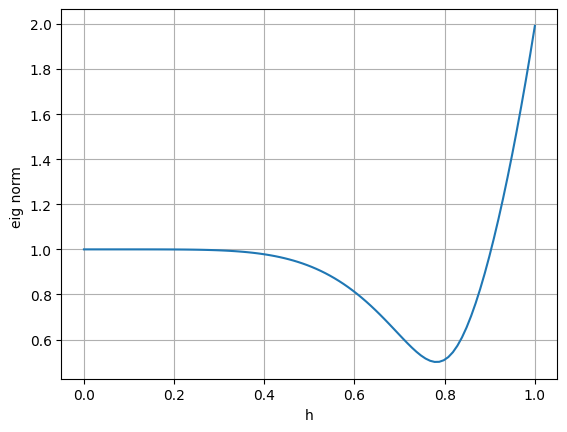

In [ ]:
eignorms = np.zeros((100,))
hvec = np.linspace(0,1,100)
x_0 = torch.tensor([0.0,0.0],requires_grad=True)
for k in range(len(eignorms)):
    hk = hvec[k]    
    eignorms[k] = ? # fill in your code here
plt.plot(hvec, eignorms)
plt.xlabel('h')
plt.ylabel('eig norm ')
plt.grid(True)
plt.show()

ผลจะเหมือนกับเอาต์พุตที่ได้จากโค้ดจูเลีย คือขนาดของค่าลักษณะเฉพาะอยู่ในวงกลมหนึ่งหน่วย จนกระทั่งเมื่อ $h$ มีค่ามากประมาณ 0.9 เมื่อค่ามากกว่านี้ค่าลักษณะเฉพาะจะออกนอกวงกลม ผลคือระบบลูกตุ้มจะไม่เสถียร สามารถย้อนกลับไปทดสอบเอาต์พุตจากการจำลองได้ 

*** 

ในส่วนสุดท้ายของ [Lecture 2 เวลา 1:12:20](https://youtu.be/_Swoo8n7DFM?si=Xdo7mhUuqhdIV3BX&t=4340) ผู้สอนได้แสดงการหาปริพันธ์แบบที่ 3 คือ *วิธีออยเลอร์ย้อนหลัง (backward Euler method)* ซึ่งเป็น *วิธีโดยปริยาย (implicit method)* มีคุณสมบัติคือเพิ่มการหน่วงให้กับระบบ ดังนั้นจะได้เอาต์พุตที่มีการแกว่งขนาดเล็กลง เราจะได้ศึกษาวิธีการนี้ในบทที่ 2 ของหนังสือ ในโน๊ตบุคนี้จะแสดงโค้ดไพทอนสำหรับจำลองพลวัตโดยวิธีออยเลอร์ย้อนหลังไว้เพื่อความสมบูรณ์ (ไม่มีส่วนที่เป็นคะแนนการบ้าน)  

สังเกตว่าวิธีการนี้จะมีการวนรอบเพื่อหาค่ารากอยู่ในฟังก์ชัน

In [22]:
def pendulum_backward_euler(func, x0, Tf, h):
    t = np.arange(0,Tf,h)
    x_hist = np.zeros((len(x0),len(t)))
    x_hist[:,0] = x0
    for k in range(len(t)-1):
        e = 1
        x_hist[:,k+1] = x_hist[:,k]
        while e > 1e-8:
            xn = x_hist[:,k] + h*func(x_hist[:,k+1])
            e = np.linalg.norm(xn - x_hist[:,k+1])
            x_hist[:,k+1] = xn
    
    return x_hist, t

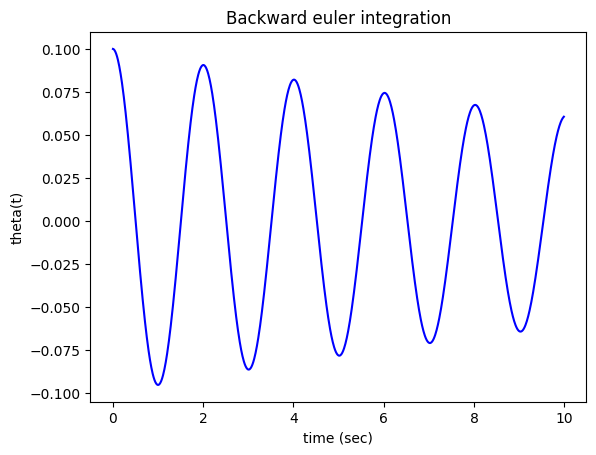

In [23]:
x0 = np.array([.1,0])
Tf = 10.0
h = 0.01
x_hist3, t_hist3 = pendulum_backward_euler(pendulum_dynamics, x0, Tf,h)
plt.figure()
plt.plot(t_hist3, x_hist3[0,:],'b-')
plt.xlabel('time (sec)')
plt.ylabel('theta(t)')
plt.title('Backward euler integration')
plt.show()

# บรรณานุกรม 

1. Z. Manchester et.al. [16-745 Optimal Control & Reinforcement Learning, 
Course materials](https://optimalcontrol.ri.cmu.edu/#learning-resources), Carnegie Mellon University. 2025.
                  
2. Wikipedia. [Runge-Kutta methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)


<div align="right">Rev 1A : 11 มกราคม 2569</div>

<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/sharing-github/refs/heads/master/dewninja_logo50.jpg" alt="dewninja"/>
</div>
<div align="center">dew.ninja 2025</div>